In [1]:
from array import array
import math
import numpy as np

In [2]:
def generator_function(x,par,ichoice):
    sum = 0.0
    for i in range(len(par)):
        sum = sum + par[i]*math.pow(x,i)
    return sum

def fitfunction(x,*paramlist):
    fitval = 0.0
    for i in range(len(paramlist)):
        fitval += paramlist[i]*x**i
    return fitval

In [3]:
ichoice = 1

In [4]:
if ichoice == 1:
    m = 1
    n = 15
    par = array('d')
    par.append(1.80)
    par.append(4.05)
    jitter = array('d')
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    sigma = array('d')
    sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
    Title = "Linear Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 2:
    m = 1
    n = 10
    par = array('d')
    par.append(6.81)
    par.append(0.656)
    jitter = array('d')
    jitter = [.3,.2,-.5,-.2,.2,.6,-.4,-1.5,.7,.5]
    sigma = array('d')
    sigma = [0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51]
    Title = "Linear Fit"
    xlow = 41.0
    xhigh = 50.0
elif ichoice == 3:
    m = 1
    n = 15
    par = array('d')
    par.append(1.80)
    par.append(4.05)
    jitter = array('d')
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0] 
    sigma = array('d')
    sigma = [.7,6,5,4,3,2,1,.5,1,2,3,4,5,6,.7]
    Title = "Linear Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 4:
    m = 1
    n = 15
    par = array('d')
    par.append(1.80)
    par.append(4.05)
    jitter = array('d')
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    sigma = array('d') 
    sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
    Title = "Linear Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 5:
    m = 3
    n = 15
    par = array('d')
    par.append(1.80)
    par.append(4.05)
    par.append(0.00)
    par.append(0.20)
    jitter = array('d')
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    sigma = array('d')
    sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
    Title = "Cubic Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 6:
    m = 2
    n = 15
    par = array('d')
    par.append(1.80)
    par.append(4.05)
    par.append(5.10)
    jitter = array('d')
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    sigma = array('d')
    sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
    Title = "Quadratic Fit"
    xlow = -4.0
    xhigh = 4.0
else:
    print("Invalid choice!!!!")

In [5]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

rootfitstring = "pol"+str(m)

In [6]:
for i in range(0,n):
    x.append(xlow+(xhigh-xlow)*i/(n-1))
    y.append(generator_function(x[i],par,ichoice)+jitter[i])
    ex.append(0.0)
    ey.append(sigma[i])

In [7]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [8]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("A matrix = ")        
print (a)
print("V matrix = ")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("A_inverse = ")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
for k in range(0,m+1):
    print("k = %d, coeff = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))

A matrix = 
[[ 7.02359410e+00 -4.16333634e-16]
 [-4.16333634e-16  4.57142857e+00]]
V matrix = 
[[11.07026417]
 [18.34421769]]
A_inverse = 
[[1.42377248e-01 1.29667206e-17]
 [1.29667206e-17 2.18750000e-01]]
Diagonal Check:
[[ 1.00000000e+00  1.15555797e-32]
 [-2.33884325e-33  1.00000000e+00]]
Coefficients:
k = 0, coeff = 1.576154 +/- 0.377329
k = 1, coeff = 4.012798 +/- 0.467707


/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84617/2090500146.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("k = %d, coeff = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))


In [9]:
yfit = 0
chi2 = 0
rho = array('d')

for i in range(0,n):
    for j in range(0,m+1):
        yfit = yfit + coeff[j]*math.pow(x[i],j)
    print ("i = %d  y = %f  yfit = %f" % (i,y[i],yfit))
    chi2 = chi2 + math.pow(((yfit-y[i])/ey[i]),2)
    yfit = 0
    
chi2perdof = chi2/(n-m)
print ("chi2/dof = %f / %f" % (chi2,(n-m-1)))

rho = np.zeros(shape = (m_params,m_params))

for k in range(0,m_params):
    for j in range(0,m_params):
        rho[k][j]=rho[k][j]+ainv[k][j]/math.sqrt(ainv[k][k]*ainv[j][j])    
print (rho)

i = 0  y = -16.400000  yfit = -14.475037
i = 1  y = -10.085714  yfit = -12.182010
i = 2  y = -10.771429  yfit = -9.888982
i = 3  y = -6.457143  yfit = -7.595955
i = 4  y = -5.142857  yfit = -5.302928
i = 5  y = -4.828571  yfit = -3.009901
i = 6  y = 1.485714  yfit = -0.716873
i = 7  y = 0.800000  yfit = 1.576154
i = 8  y = 5.114286  yfit = 3.869181
i = 9  y = 6.428571  yfit = 6.162208
i = 10  y = 6.742857  yfit = 8.455235
i = 11  y = 13.057143  yfit = 10.748263
i = 12  y = 12.371429  yfit = 13.041290
i = 13  y = 16.685714  yfit = 15.334317
i = 14  y = 18.000000  yfit = 17.627344
chi2/dof = 10.699207 / 13.000000
[[1.00000000e+00 7.34743623e-17]
 [7.34743623e-17 1.00000000e+00]]


/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84617/3703061364.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("i = %d  y = %f  yfit = %f" % (i,y[i],yfit))
/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84617/3703061364.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  chi2 = chi2 + math.pow(((yfit-y[i])/ey[i]),2)


In [10]:
xfiterr = array('d')
yfiterr = array('d')
yfitplus2 = array('d')
yfitminus2 = array('d')

for i in range(0,n):
    xfiterr.append(xlow+(xhigh-xlow)*i/(n-1))
    yerror2 = 0.0
    yval = 0.0
    for k in range(0,m+1):
        for j in range(0,m+1):
            term = rho[k][j]*math.pow(xfiterr[i],k)*math.pow(ainv[k][k],0.5)*(math.pow(xfiterr[i],j)*math.pow(ainv[j][j],0.5))
            #print (k,j,term)
            yerror2 = yerror2 + term
        yval = yval + coeff[k]*math.pow(xfiterr[i],k)
    yfiterr.append(yval)
    yfitplus2.append(yval+math.sqrt(yerror2))
    yfitminus2.append(yval-math.sqrt(yerror2))
    print(i,xfiterr[i],yval,math.sqrt(yerror2),yfitplus2[i],yfitminus2[i])

0 -4.0 [[-14.47503673]] 1.9085013094182544 -12.566535418715379 -16.383538037551887
1 -3.428571428571429 [[-12.18200952]] 1.647363293108039 -10.534646224141241 -13.82937281035732
2 -2.857142857142857 [[-9.88898231]] 1.388557357031202 -8.500424949333725 -11.277539663396128
3 -2.2857142857142856 [[-7.5959551]] 1.1336817855590402 -6.462273309921533 -8.729636881039614
4 -1.7142857142857144 [[-5.30292788]] 0.8861345219030428 -4.416793362693176 -6.189062406499262
5 -1.1428571428571428 [[-3.00990067]] 0.6542870423334676 -2.355613631378398 -3.664187716045333
6 -0.5714285714285716 [[-0.71687346]] 0.4623914137176022 -0.2544820491099107 -1.179264876545115
7 0.0 [[1.57615375]] 0.3773290978061343 1.9534828458629758 1.1988246502507072
8 0.5714285714285712 [[3.86918096]] 0.46239141371760206 4.331572372658796 3.406789545223592
9 1.1428571428571432 [[6.16220817]] 0.6542870423334678 6.816495212159018 5.507921127492083
10 1.7142857142857144 [[8.45523538]] 0.8861345219030428 9.341369902612946 7.56910085880

/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84617/604238187.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yfiterr.append(yval)
/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84617/604238187.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yfitplus2.append(yval+math.sqrt(yerror2))
/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84617/604238187.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yfitminus2.append(yval

[1.57615375 4.01279762] [[1.42377248e-01 1.98039745e-10]
 [1.98039745e-10 2.18749996e-01]]
Coefficients (from curve_fit)
[1.57615375 4.01279762]
Covariance Matrix (from curve_fit)
[[1.42377248e-01 1.98039745e-10]
 [1.98039745e-10 2.18749996e-01]]
Chi^2 / dof = 1.070E+01 / 13
Fit Parameter 0: 1.576E+00 +/- 3.773E-01
0 1 1.122E-09
Fit Parameter 1: 4.013E+00 +/- 4.677E-01


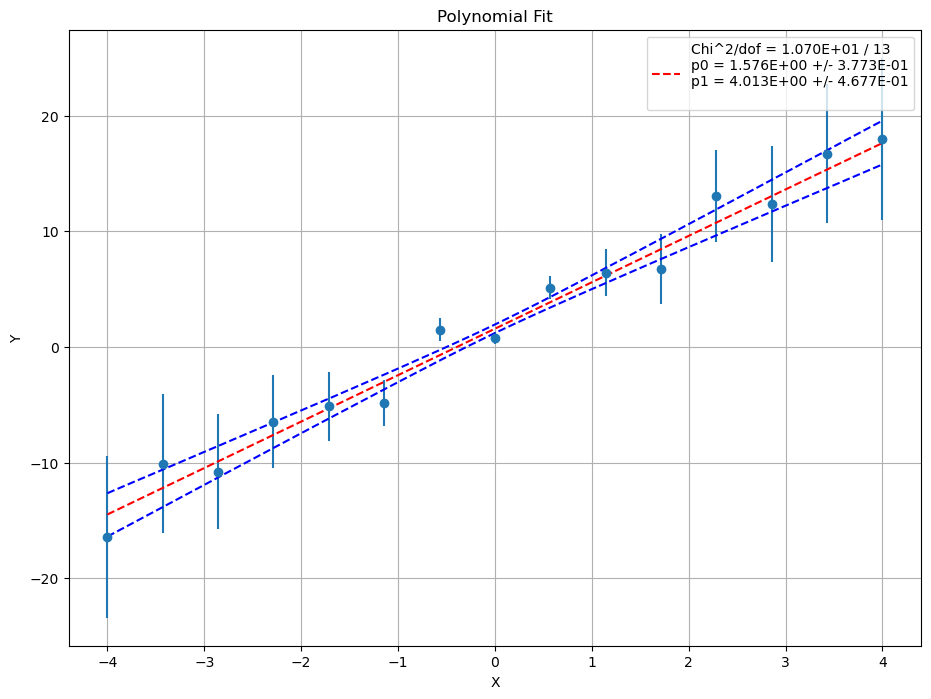

In [11]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.array(x)
y = np.array(y)
ex = np.array(ex)
ey = np.array(ey)

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.set_title("Polynomial Fit")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_yscale("linear")
ax1.grid(True)

ax1.errorbar(x,y,yerr=ey,fmt='o')

init_vals = [0.0 for x in range(0,m_params)]
#popt, pcov = curve_fit(fitfunction,x,y,sigma=ey,p0=init_vals)
popt, pcov = curve_fit(fitfunction,x,y,sigma=ey,p0=init_vals,absolute_sigma=True)

print (popt,pcov)

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

yfit = []
chi2=0
for i in range (0,n):
    yfit.append(fitfunction(x[i],*popt))
    #chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(ey[i]*ey[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,n-len(init_vals)))

param = []
rhom = []
param.append(float(chi2))
param.append(n-len(init_vals))
for ii in range(0,len(init_vals)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))
    for jj in range(0,len(init_vals)):
        rhom.append(float(pcov[ii][jj])/pow(float(pcov[ii][ii]*pcov[jj][jj]),0.5))
        if jj > ii:
            print("%d %d %.3E" % (ii,jj,rhom[ii*len(init_vals)+jj]))

mylabel = "Chi^2/dof = %.3E / %d\n"
for i in range(0,len(init_vals)):
    code = "p" + str(i)
    mylabel = mylabel + code + " = %.3E +/- %.3E\n"

ax1.plot(xi, fitfunction(xi, *popt), 'r--', label = mylabel % tuple(param))
ax1.plot(xi,lower,'b--')
ax1.plot(xi,upper,'b--')

leg = ax1.legend()
plt.show()

In [12]:
index=7
yfitvalue = 0.0
yerrorvalue = 0.0
for k in range(0,m_params):
    yfitvalue = yfitvalue + coeff[k]*math.pow(x[index],k)
    yerrorvalue = yerrorvalue + math.pow(math.pow(x[index],k)*math.pow(ainv[k][k],0.5),2)
yerrorvalue = math.sqrt(yerrorvalue)
print ("P201 Error Calculation = %f +/- %f " % (yfitvalue,yerrorvalue))
print ("Proper Error Calculation = %f +/- %f " % ((yfitplus2[index]+yfitminus2[index])/2.0,(yfitplus2[index]-yfitminus2[index])/2.0))


P201 Error Calculation = 1.576154 +/- 0.377329 
Proper Error Calculation = 1.576154 +/- 0.377329 


/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84617/1387294335.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("P201 Error Calculation = %f +/- %f " % (yfitvalue,yerrorvalue))
